----------------------

# Исследование популярного сервиса аренды самокатов GoFast

**Введение**

В данной работе мы будем различные методы анализирования и визуализирования данных, чтобы увидеть насколько точны данные для последующей работы, также построим разные соотношения 2 групп людей( с подпиской и без нее), тем самым мы поймем в какую сторону развиватсья компании дальше. Также проверим гипотезы связанные с помесячной выручкой каждого пользователя по группам(кто выгоднее компании), длительностью поездки и связь износа самокатов с ultra пользователями.


**Цели**

С помощью данных выяснить лучшие пути развития для компании, разобрать возможные ошибки.


**Задачи**

Задачи будут описаны ниже ввиде чекбоксов.

In [1]:
import pandas as pd
from math import sqrt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, norm

**Загрузка данных**
- [x] Считать CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.
- [x] Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме

**Предобработка данных**
- [x] Привести столбец date к типу даты pandas.
- [x] Создать новый столбец с номером месяца на основе столбца date.
- [x] Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

**Исследовательский анализ данных**

Описать и визуализировать общую информацию о пользователях и поездках:

- [x] частота встречаемости городов;
- [x] соотношение пользователей с подпиской и без подписки;
- [x] возраст пользователей;
- [x] расстояние, которое пользователь преодолел за одну поездку;
- [x] продолжительность поездок.

**Объединение данных**

- [x] Объединить данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
- [x] Создать ещё два датафрейма из датафрейма, созданного на этапе выше:
- [x] данными о пользователях без подписки;
- [x] данными о пользователях с подпиской.
- [x] Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Подсчёт выручки**

- [x] Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- [x] В этот же датафрейм добавить столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

**Проверка гипотез**

- [x] Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- [x] Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- [x] Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- [x] Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Распределения**
- [x] Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

- [x] Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

#### Шаг 1. Загрузка данных

In [2]:
# Создаем датасеты
df_users_go = pd.read_csv('/datasets/users_go.csv', sep=',')
df_riders_go = pd.read_csv('/datasets/rides_go.csv', sep=',')
df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

In [3]:
# Выведем первые строки каждого дата фрейма
print(df_users_go.head(), '\n')
print(df_riders_go.head(), '\n')
print(df_subscriptions_go.head(), '\n')

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra 

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28 

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199 



In [4]:
#Изучим датасет users
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


 В датасете df_users_go пропусков не обнаружено/
 

In [5]:
df_riders_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датасете df_riders_go пропусков не обнаружено / Данные в столбце date имеют неправельный тип данных.

In [6]:
df_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод по 1 шагу:**
* В дата фрейме df_users_go 1565 строк, 5 столбцов, пропусков нет, проблем с наименованием столбцов тоже.


* В дата фрейме df_riders_go 18068  строк, 4 столбца пропусков нет, проблем с наименованием столбцов тоже, есть проблема с типом данных столбца date.


* В дата фрейме df_subscriptions_go 2 строки, 4 столбца пропусков нет, проблем с наименованием столбцов тоже.



#### Шаг 2. Предобработка данных

In [7]:
# Переведем столбец date в нужный формат
df_riders_go['date'] = pd.to_datetime(df_riders_go['date'], format= '%Y-%m-%d')
df_riders_go['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

In [8]:
# Создадим новый столбец с месяцем на основе date
df_riders_go['date_month'] = pd.DatetimeIndex(df_riders_go['date']).month
print(df_riders_go['date_month'].unique())
df_riders_go.head(10)

[ 1  4  8 10 11 12  3  6  7  2  5  9]


,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [9]:
# Проверим на дубликаты
print('Количество дубликатов в датасете df_users_go: ', df_users_go.duplicated().sum())

print('Количество дубликатов в датасете df_riders_go: ', df_riders_go.duplicated().sum())

print('Количество дубликатов в датасете df_subscriptions_go: ', df_subscriptions_go.duplicated().sum())

Количество дубликатов в датасете df_users_go:  31
Количество дубликатов в датасете df_riders_go:  0
Количество дубликатов в датасете df_subscriptions_go:  0


In [10]:
# Избавимся от дубликатов
df_users_go.drop_duplicates(inplace=True)
df_users_go.duplicated().sum()

0

In [11]:
# Также проверим на Nan значения
df_users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
df_riders_go.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [13]:
df_subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Вывод по 2 шагу:**

Была проведена предобработка данных.

* Столбец date из типа object был переведен в формат datetime.

* Создали дополнительный столбец с отдельными месяцами date_month.

* Пропущенных значений и значений Nan нет.

* Явные дубликаты в датасете df_users_go были удалены 31 дубликат в сете из 1565 (1,98% данных, можно принебречь).

#### Шаг 3. Исследовательский анализ данных

Text(0.5, 1.0, 'Частота встречаемости городов')

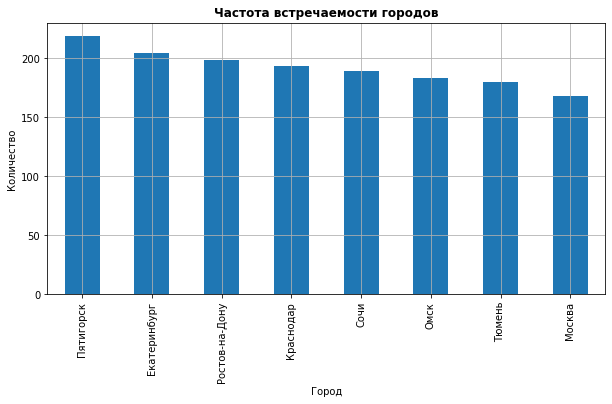

In [14]:
# Проанализируем и визуализируем частоту встречаемости городов
city_pivot_table = df_users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id',ascending=False)
city_pivot_table.plot(kind='bar',grid=True,figsize = (10,5))
ax = plt.gca()
ax.get_legend().remove()
plt.xlabel("Город", fontsize=10, fontweight="regular")
plt.ylabel("Количество", fontsize=10, fontweight="regular")
plt.title(label='Частота встречаемости городов', loc='center', fontweight="bold")

По гистограмме можно сделать вывод, что топ 3 встречающихся городов: Пятигорск(219),Екатеринбург(204),Ростов-на-Дону(198)

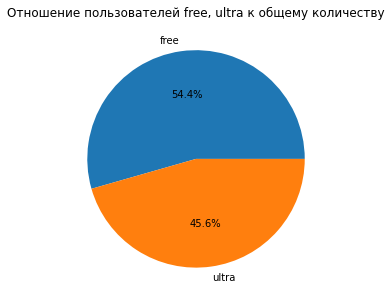

,кол-во пользователей
subscription_type,
free,835
ultra,699


In [15]:
# Проанализируем и визуализируем соотношение пользователей с подпиской и без подписки
sub_pivot_table = df_users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
sub_pivot_table.plot(kind='pie',y='user_id',figsize = (10,5), autopct='%1.1f%%', 
                     title='Отношение пользователей free, ultra к общему количеству')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.get_legend().remove()
plt.show()
sub_pivot_table.rename(columns = {'user_id' : 'кол-во пользователей'},inplace = True)
sub_pivot_table

По соотношению, можно сделать вывод, что пользователей с подпиской free больше, чем пользователей с подпиской ultra.

Text(0.5, 1.0, 'Возраст пользователей')

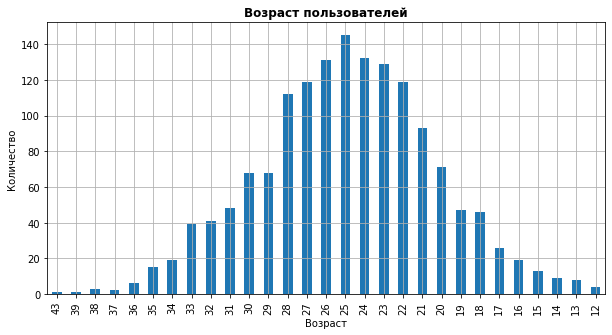

In [16]:
# Проанализируем и визуализируем возраст пользователей
age_pivot_table = df_users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age',ascending=False)
age_pivot_table.plot(kind='bar',grid=True,figsize = (10,5))
ax = plt.gca()
ax.get_legend().remove()
plt.xlabel("Возраст", fontsize=10, fontweight="regular")
plt.ylabel("Количество", fontsize=10, fontweight="regular")
plt.title(label='Возраст пользователей', loc='center', fontweight="bold")

По графику можно сделать вывод, что преобладают пользователи от 20-30 лет.

Text(0, 0.5, 'Количество пользователей')

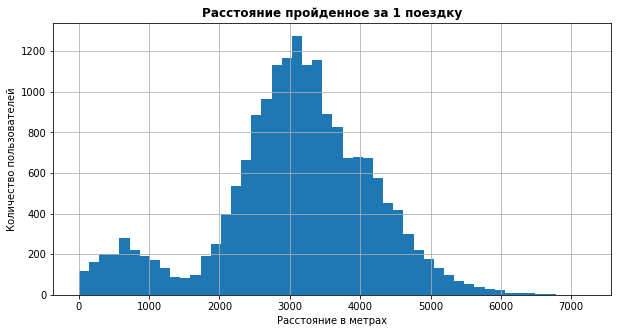

In [17]:
# Проанализируем и визуализируем расстояние, которое пользователь преодолел за одну поездку;
df_riders_go['distance'].hist(bins=50,figsize=(10,5))
plt.title('Расстояние пройденное за 1 поездку', loc='center', fontweight="bold")
plt.xlabel("Расстояние в метрах", fontsize=10, fontweight="regular")
plt.ylabel("Количество пользователей", fontsize=10, fontweight="regular")

Тут можем заметить небольшое деление на 2 группы, пользователи с короткой поездкой до 1км (либо передумали, случилась ошибка, либо и вправду нужно было преодалеть такое малое растояение за короткий промежуток времени) и пользователи, который преодолели расстояние от 2км до 5км.

Text(0, 0.5, 'Количество пользователей')

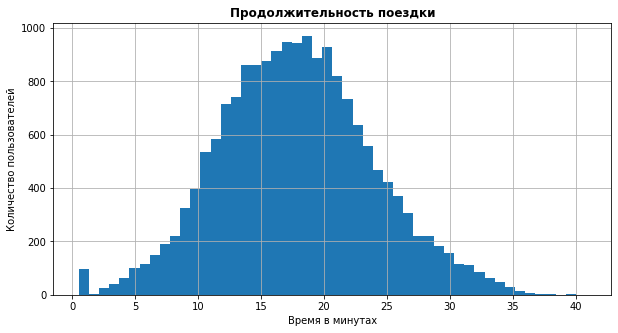

In [18]:
# Проанализируем и визуализируем продолжительность поездок.
df_riders_go['duration'].hist(bins=50,figsize=(10,5))
plt.title('Продолжительность поездки', loc='center', fontweight="bold")
plt.xlabel("Время в минутах", fontsize=10, fontweight="regular")
plt.ylabel("Количество пользователей", fontsize=10, fontweight="regular")

Основная масса пользователей совершала поездки от 5 до 30 минут, также видим небольшой выброс около 0, возомжно данные пользователи отменяли свою поездку.

**Вывод по 3 шагу:**

Были описаны и визуализированны такие параметры как:

* Частота встречаемости городов, где топ-3 города Пятигорск, Екатеренбург и Росотов-на-Дону.


* Соотношение пользователей с подпиской и без подписки, оказалось что пользователей с подпиской free больше.


* Возраст пользователей, основная масса 20-30 лет.


* Расстояние, которое пользователь преодолел за одну поездку, есть группа пользователей с поездками до 1км, но в основном пользватели преодолевали расстояния от 2км до 5км.


* Продолжительность поездок, есть небольшой выброс в данных, это возможно объясняется отменой поездки сразу же после оформления. В основной массе пользователи тратили на 1 поездку от 5 до 30 минут.

#### Шаг 4. Объединение данных

In [19]:
# Создадим датафрейм объединяющий данные о пользователях, поездках и подписках.
df = df_users_go.merge(df_riders_go)
df = df.merge(df_subscriptions_go)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   date_month         18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [20]:
# Создадим дополнительные датафреймы с free и ultra подписками
df_free_sub = df[df['subscription_type'] == 'free']
df_ultra_sub = df.query('subscription_type == "ultra"')

In [21]:
df_free_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [22]:
df_ultra_sub.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


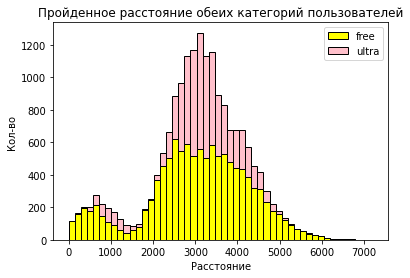

In [23]:
# Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

plt.hist([df_free_sub['distance'], df_ultra_sub['distance']], bins=50, stacked=True, color=['Yellow', 'Pink'], edgecolor='black')
plt.legend(['free', 'ultra'])
plt.xlabel('Расстояние')
plt.ylabel('Кол-во')
plt.title('Пройденное расстояние обеих категорий пользователей')
plt.show()

Сравнив пройденное растояние обеих категорий, можно сделать вывод, что пользователи с подпиской ultra чаще преодалевают расстояние более 3км, возможно это связанно с тем, что стоимость старта и стоимость 1 минуты поездки меньше, чем в подписке free.

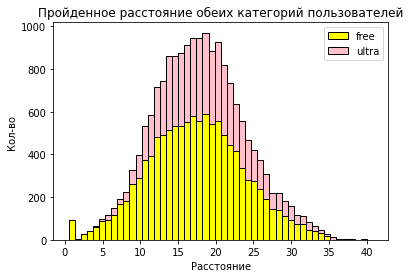

In [24]:
plt.hist([df_free_sub['duration'], df_ultra_sub['duration']], bins=50, stacked=True, color=['Yellow', 'Pink'], edgecolor='black')
plt.legend(['free', 'ultra'])
plt.xlabel('Расстояние')
plt.ylabel('Кол-во')
plt.title('Пройденное расстояние обеих категорий пользователей')
plt.show()

Особо сильных отличий в длительности поездки между двумя категорями нет.

**Вывод по 4 шагу:**

* Был создан полный датафрейм df, с помощью объединения 3 изначальных.

* Из полного датафрейма были выделены 2 группы пользователей исходя из их подписок (free и ultra).

* Проанализировав и сравнив 2 новые группы, были сделаны выводы, что пользователи с ultra подпиской преодалевают большее расстояние, возможно из-за пониженной стоимости поездки за 1 минуту.

#### Шаг 5. Подсчёт выручки

In [25]:
# Создадим датафрейм с агрегированными данными о поездках 
# Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

# Округлим время поездки
df['duration'] = np.ceil(df['duration'])
df_pivot_sum_month = df.pivot_table(index =['user_id','date_month'],
                                   values = ('distance','name','duration','subscription_type'),
                                   aggfunc = ({'distance': sum,'name': len,'duration': sum,'subscription_type': max})
                                   )
df_pivot_sum_month.rename(columns = {'name' : 'trips','date_month' : 'month', 'distance' : 'total_distance',
                                    'duration' : 'total_duration'}, inplace = True)
df_pivot_sum_month.head(10)

total_distance  total_duration  trips subscription_type
user_id date_month                                                         
1       1              7027.511294            42.0      2             ultra
        4               754.159807             7.0      1             ultra
        8              6723.470560            46.0      2             ultra
        10             5809.911100            32.0      2             ultra
        11             7003.499363            56.0      3             ultra
        12             6751.629942            28.0      2             ultra
2       3             10187.723006            63.0      3             ultra
        4              6164.381824            40.0      2             ultra
        6              3255.338202            14.0      1             ultra
        7              6780.722964            48.0      2             ultra

In [26]:
# Добавим к новому датафрейму выручку за месяц для этого можем создать функцию, которая будет считать выручку исходя из тарифа.
#free
#абонентская плата отсутствует;
#стоимость одной минуты поездки — 8 рублей;
#стоимость старта (начала поездки) — 50 рублей;
#ultra
#абонентская плата — 199 рублей в месяц;
#стоимость одной минуты поездки — 6 рублей;
#стоимость старта — бесплатно. 


def revenue_count(frame):
    if frame['subscription_type'] == 'free':
       return 8 * frame['total_duration'] + 50 * frame['trips']
    elif frame['subscription_type'] == 'ultra':
       return  6 * frame['total_duration'] + 199
    else: 
        return 'error'
        
        

In [27]:
df_pivot_sum_month['revenue'] = df_pivot_sum_month.apply(revenue_count, axis=1)
df_pivot_sum_month

total_distance  total_duration  trips subscription_type  \
user_id date_month                                                            
1       1              7027.511294            42.0      2             ultra   
        4               754.159807             7.0      1             ultra   
        8              6723.470560            46.0      2             ultra   
        10             5809.911100            32.0      2             ultra   
        11             7003.499363            56.0      3             ultra   
...                            ...             ...    ...               ...   
1534    6              3409.468534            26.0      2              free   
        8              7622.453034            48.0      2              free   
        9              4928.173852            23.0      1              free   
        11            13350.015305            78.0      4              free   
        12             2371.711192            16.0      1              free   

                    revenue  
user_id date_month           
1       1             451.0  
        4             241.0  
        8             475.0  
        10            391.0  
        11            535.0  
...                     ...  
1534    6             308.0  
        8             484.0  
        9             234.0  
        11            824.0  
        12            178.0  

[11331 rows x 5 columns]

In [28]:
print(df_pivot_sum_month.groupby('subscription_type').sum(), '\n')
print('Выручка за год: ',df_pivot_sum_month['revenue'].sum(), '\n')
print(df_pivot_sum_month.groupby('subscription_type').mean(), '\n')

                   total_distance  total_duration  trips    revenue
subscription_type                                                  
free                 3.523029e+07        206963.0  11568  2234104.0
ultra                2.025040e+07        123745.0   6500  1644537.0 

Выручка за год:  3878641.0 

                   total_distance  total_duration     trips     revenue
subscription_type                                                      
free                  5182.449164       30.444690  1.701677  328.641365
ultra                 4467.327382       27.298698  1.433929  362.792191 



**Вывод по 5 шагу:**

Проведя анализ выручки, были сделаны выводы:

* За год пользователи с подпиской free принесли на 576 483 рублей меньше, чем пользователи с подпиской ultra( стоит учитывать, что пользователей с подпиской free больше).

* Общий доход за год: 3 853 677 рублей.

* В среднем пользователи с подпиской free приносили 325 рублей в месяц, когда с подпиской ultra 361 рубль.

#### Шаг 6. Проверка гипотез

**1 Гипотеза.**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0 : Продолжительность поездки подписки free и ultra равны.

H1 : Продолжительность поездки подписки ultra > free.

Уровень статистической значимости alpha = .05


In [29]:
h_ultra = df_ultra_sub['duration']
h_free = df_free_sub['duration']

results = st.ttest_ind(h_ultra, h_free, alternative = 'greater')
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


1) Отвергнув нулевую гипотезу, мы можем сделать вывод, что пользователи с подпиской ultra, тратят больше времени на поездки.

**2 Гипотеза.**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0 : Расстояние одной поездки = 3130.

H1 : Расстояние одной поездки > 3130.

Уровень статистической значимости alpha = .05

In [30]:
h_distance_ultra = df_ultra_sub['distance']

value = 3130

results = st.ttest_1samp(h_distance_ultra, value, alternative = 'greater')
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


2) Проверив вторую гипотезу, мы можем утверждать, что среднее расстояние, которое пользователи ultra проезжают за одну поездку не привышает оптимальное (3130 метра) с точки зрения износа самоката.

**3 Гипотеза.**

Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделать вывод.

H0 : Помесечная выручка от пользователей ultra = помесечной выручки от пользователей free.

H1 : Помесечная выручка от пользователей ultra > помесечной выручки от пользователей free.

Уровень статистической значимости alpha = .05

In [31]:
h_revenue_ultra = df_pivot_sum_month['revenue'][df_pivot_sum_month['subscription_type'] == 'ultra']
h_revenue_free = df_pivot_sum_month['revenue'][df_pivot_sum_month['subscription_type'] == 'free']

results = st.ttest_ind(h_revenue_ultra, h_revenue_free, alternative = 'greater')
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


3) Отвергнув нулевую гипотезу, мы можем сделать вывод, что помесечная выручка от пользователей с подпиской ultra выше, чем от пользователей с подпиской free.

**4 Гипотеза.**

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**

Мы имеем две зависимые выборки, значит для проверки мы будем использовать гипотезу о равенстве среднего значения генеральной совокупности до и после изменения.

H0 : x1 = x2.

H1 : x1 > x2.

Где x1 - среднее кол-во обращений "до", x2 - среднее кол-во обращений "после".

**Код будет выглядеть так:**
```python
x1 = df_before
x2 = df_after
results = scipy.stats.ttest_rel(x1,x2,alternative = 'greater')
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
```

**Вывод по 6 шагу:**

Мы провели проверку 3 гипотез и ответили на вопрос 4 гипотезы, что нам это дало?


* По первой гипотезе мы сделалил вывод, что пользователи с подпиской ultra, тратят больше времени на поездки, чем пользователи с подпиской free, обслуволено это возомжно стоимостью поездки за 1 минуту.


* Вторую гипотезу мы не смогли отвергнуть нулевую гипотезу, следователньо, мы не можем говорить, что среднее расстояние, которое пользователи ultra проезжают за одну поездку меньше чем оптимальное (3130 метра) с точки зрения износа самоката.


* Третья гипотеза показала нам, что пользователи с подпиской ultra дают больше выручку за месяц, чем пользователи с подпиской free.

#### Шаг 7. Распределения

Кол-во промокодов нужных для достижениях успеха: 1172


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


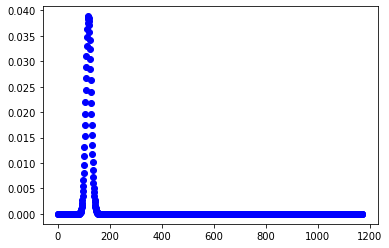

In [32]:
# Узнаем какое кол-во бесплатных периодов нужно раздать, чтобы вероятность не выполнить план была примерно 5%.
# Исходя из прошлого эксперимента 10% продлили подписку, следовательно нам нужно раздать 1000 промокодов.

n = 1000 # количество испытаний
p = 0.1 # вероятность успеха в данном испытании
k = 100 # количество успехов
b_cdf = 0.05 # вероятность не выполнить план 5%

while b_cdf < binom.cdf(k,n,p):
    n +=1
print('Кол-во промокодов нужных для достижениях успеха:',n)
binom_probs = []
for k in range(n + 1):
    binom_prob = binom.pmf(k, n, p)
    binom_probs.append(binom_prob)
plt.plot(range(n + 1), binom_probs, 'bo',
         label=f'Биномиальное распределение с n={n} и p={p}')

**Вывод:** Необходимо минимум 1172 промокода, для того чтобы минимум 100 клиентов продлили подписку.

2) 
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [33]:
n= 1000000
p = 0.4
k = 399500

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) # задаём нормальное распределение
result = distr.cdf(k)# считаем вероятность хвоста слева от 399.5 тысяч
print('Вероятность открытия сообщений:', result)

Вероятность открытия сообщений: 0.15371708296369768


**Вывод:** Вероятность того, что сообщение откроют не более 399.5 тысяч пользователей равна 15,37 %.

# Общий вывод:

Представленные для анализа данные содержали информацию о некоторых пользователях из нескольких городов, а также об их поездках.

**Данные**

* В процессе анализа и обработки данных проблем не возникло все данные были приведены к нужному типу, пропщенных значений не было, данные были репрезентативны,так же были удалены 31 дубликат, возможно техническая ошибка.

* Были добавлены и расчитаны новые дата сетты для последующего анализа(2 группы дата сеттов по подпискам и расчет помесечной выручки).

**Результаты исследования**

* По итогам анализа таких параметров как, частота встречаемости городов; соотношение пользователей с подпиской и без подписки;возраст пользователей;расстояние, которое пользователь преодолел за одну поездку;продолжительность поездок; были сделаны выводы:

    *  Топ 3  городов пользующихся самокатами GoFast: Пятигорск, Екатеринбург, Ростов-на-Дону.
    
    *  Пользователей с подпиской free больше, чем пользователей с подпиской ultra.
    
    *  Основной возраст пользователей 20-30 лет.
    
    *  Расстояние преодаленное за одну поездку либо не превышало 1 км (возможно были проблемы с самокатами, или просто короткая дорога для пользователя), либо основная масса в среднем 2-5 км.
    
    *  Длительность поездки варьируется от 5 до 30 минут, также были замечены поездки длящиеся меньше минуты( скорее всего поездки были отменены, нужно уточнить почему, данных для таких выводов недостаточно).


* Далее было проведено сравнение по некоторым параметрам пользователей с подписками ultra и free. Это дало нам следующие выводы:

    * Пользователи с подпиской ultra чаще преодалевают расстояние более 3км, возможно это связанно с тем, что стоимость старта и стоимость 1 минуты поездки меньше, чем в подписке free.
    
    * Разницы в длительности поездки между двумя категорями нет.
    
* Были проведены расчеты месячной выручки:

    * За год пользователи с подпиской free принесли на 576 483 рублей меньше, чем пользователи с подпиской ultra( стоит учитывать, что пользователей с подпиской free больше).

    * Общий доход за год: 3 853 677 рублей.

    * В среднем пользователи с подпиской free приносили 325 рублей в месяц, когда с подпиской ultra 361 рубль.
    
* В заключении были проведены проверки гипотез:

    * По результатам проверки первой гипотезы, был сделан вывод, что пользователи с подпиской ultra, тратят больше времени на поездки.

    * По результатам проверки второй гипотезы, мы можем предположить, что пользователи с подпиской ultra не привышают оптимального для самоката расстояния в 3130 метров.
    
    * По результатам проверки третьей гипотезы, было видно, что пользователи с подпиской ultra дают больше выручку за месяц, чем пользователи с подпиской free.
    
**Рекомендации:**

   Исходя из вышесказанных результатов, хорошим решением для компании GoFast будет сосредоточение на увеличение пользователей с подпиской ultra, это можно будет сделать с помощью промоакций, бесплатных промокодов на пробный период. Для нормализации оптимального расстояния за 1 поездку, чтобы замедлить изнашивание самокатов, можно снизить абоненсткую плату, но добавить плату за пройденный метр.